In [1]:
import numpy as np
import pandas as pd
import torch
import matplotlib.pyplot as plt
import torch.nn as nn
from sklearn.model_selection import train_test_split
import torch.nn.functional as F
%matplotlib inline
# 生成数据
x = torch.linspace(-2*torch.pi,2*torch.pi,10000) #(1000, )
x = torch.unsqueeze(input=x, dim=1)  # (1000, 1)
y = torch.cos(x)  # (1000, 1)

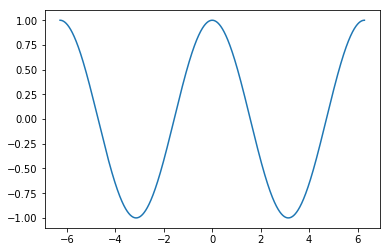

<Figure size 432x288 with 0 Axes>

loss: 0.5085358023643494 0


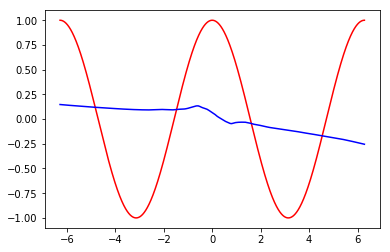

loss: 0.0020990564953535795 100


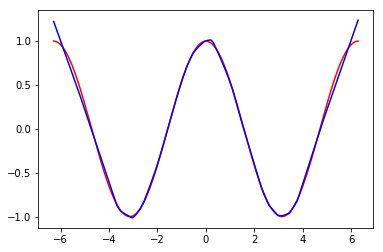

loss: 0.0035781189799308777 200


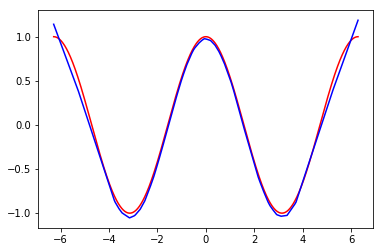

loss: 0.001501190708950162 300


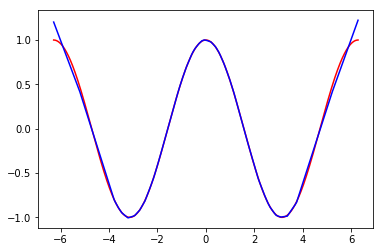

loss: 0.0013003337662667036 400


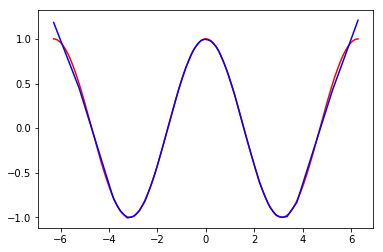

loss: 0.00236352626234293 500


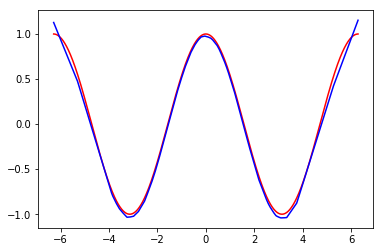

loss: 0.0008775273454375565 600


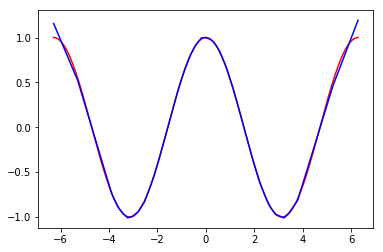

loss: 0.0006983990897424519 700


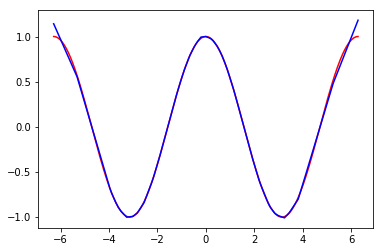

loss: 0.005806006025522947 800


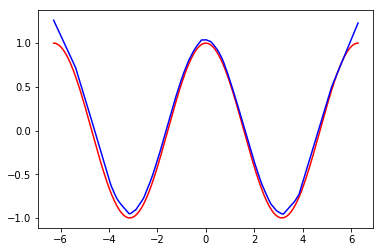

loss: 0.00045992221566848457 900


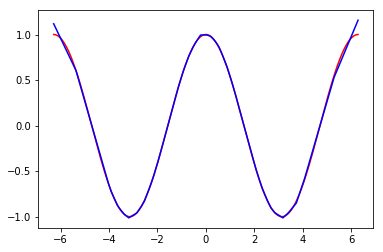

loss: 0.00035320219467394054 1000


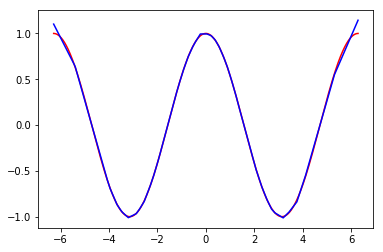

loss: 0.00028196361381560564 1100


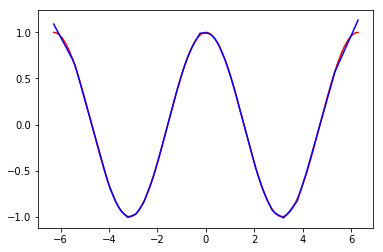

loss: 0.00024416897213086486 1200


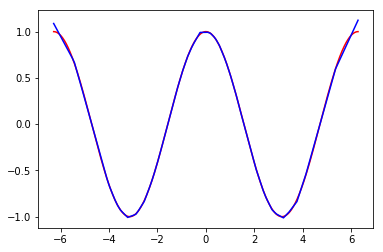

loss: 0.0001998584921238944 1300


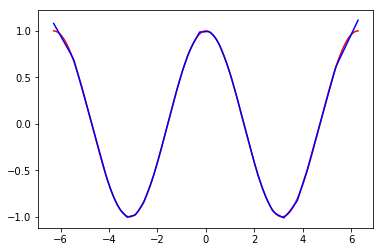

loss: 0.000252405705396086 1400


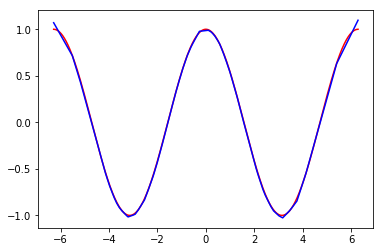

loss: 0.0001505314139649272 1500


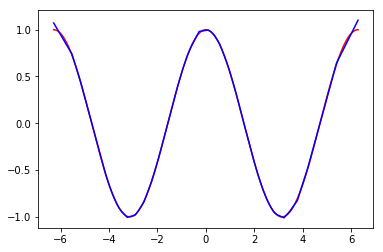

loss: 0.00012185206287540495 1600


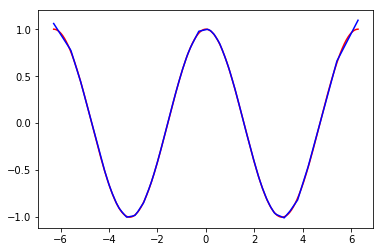

loss: 5.823765241075307e-05 1700


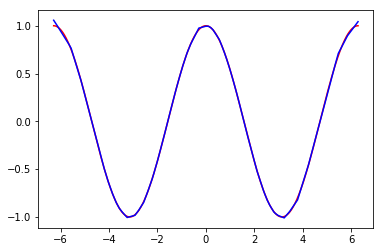

loss: 4.7125256969593465e-05 1800


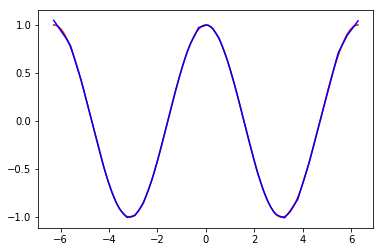

loss: 0.0049193487502634525 1900


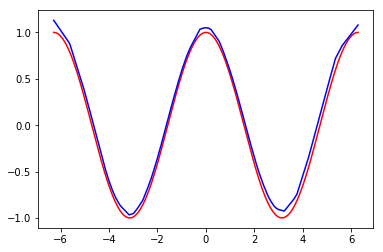

loss: 4.563893162412569e-05 2000


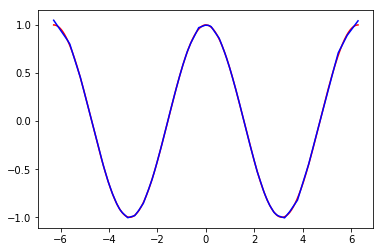

loss: 4.2133713577641174e-05 2100


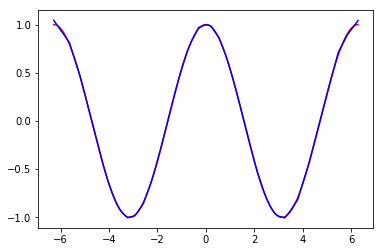

loss: 0.00014218689466360956 2200


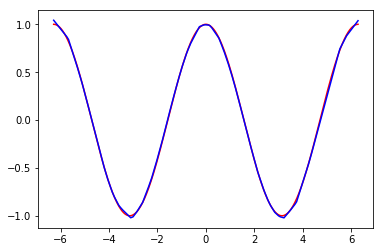

loss: 3.6075423849979416e-05 2300


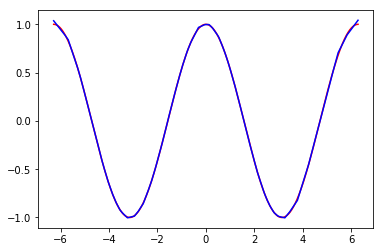

loss: 3.404189192224294e-05 2400


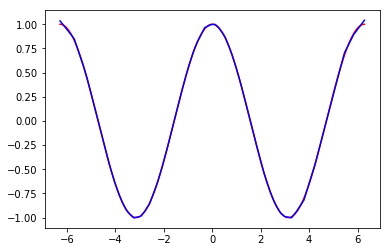

loss: 0.00025350265786983073 2500


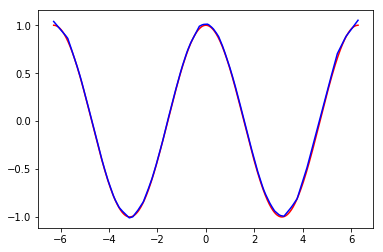

loss: 3.14607605105266e-05 2600


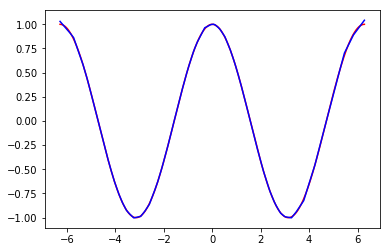

loss: 5.2862538723275065e-05 2700


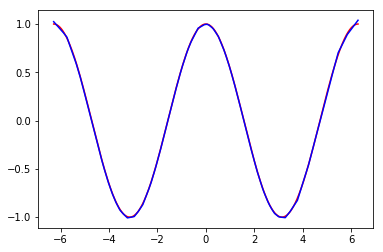

loss: 3.2042633392848074e-05 2800


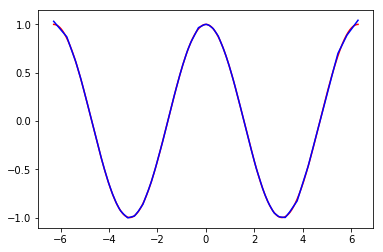

loss: 2.9829285267624073e-05 2900


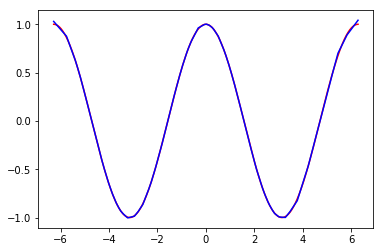

In [2]:
plt.plot(x.numpy(),y.numpy())
plt.show()
# 定义mlp模型
class MLPregression(nn.Module):
    def __init__(self):
        super(MLPregression, self).__init__()
        self.fc1 = nn.Linear(1, 64)  # 输入层到隐藏层
        self.fc2 = nn.Linear(64, 64)  # 隐藏层到隐藏层
        self.fc3 = nn.Linear(64, 1)  # 隐藏层到输出层
    def forward(self,x):
        x=F.relu(self.fc1(x))
        x=F.relu(self.fc2(x))
        return self.fc3(x)
model=MLPregression()
loss_fn = nn.MSELoss()  #均方差做损失函数
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# 迭代次数
batches = 3000
plt.figure("regression")                     #新建一张画布，打印数据点和预测值
plt.ion() #开启交互模式
plt.show()
for i in range(batches):
    optimizer.zero_grad()
    y_pred = model(x)
    loss = loss_fn(y_pred, y)

    loss.backward()
    optimizer.step()
    
    if i % 100 == 0:
        loss, batch = loss.item(), i
        print(f'loss: {loss} {batch}')
        plt.cla() # 清除当前图形的所有轴
        plt.plot(x.cpu().numpy(), y.cpu().numpy(),'r')
        plt.plot(x.cpu().numpy(), y_pred.detach().cpu().numpy(),'b')
        plt.pause(0.001)
        plt.show()


In [3]:
# 生成数据
x = torch.linspace(-2*torch.pi,2*torch.pi,10000) #(1000, )
x = torch.unsqueeze(input=x, dim=1)  # (1000, 1)
y = torch.sin(x)  # (1000, 1)

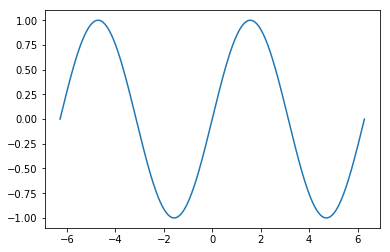

<Figure size 432x288 with 0 Axes>

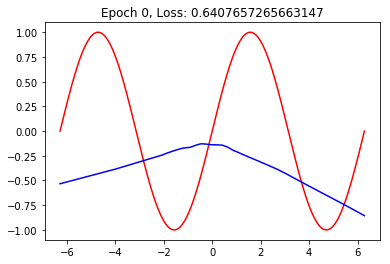

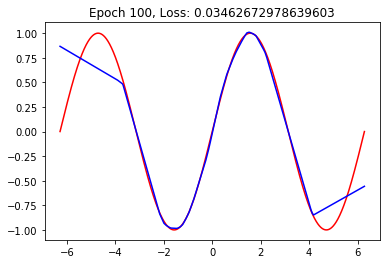

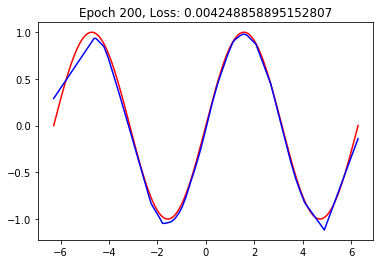

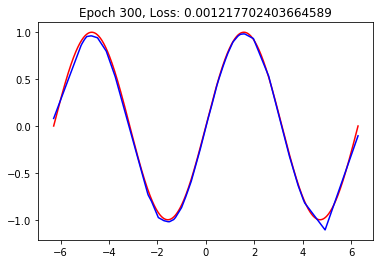

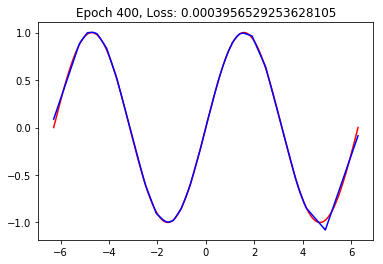

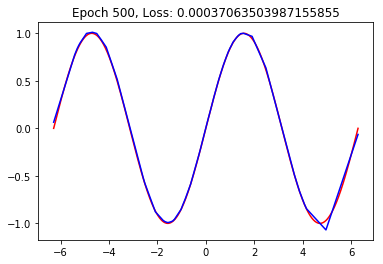

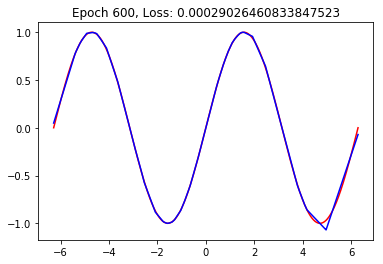

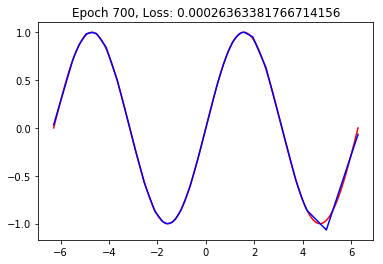

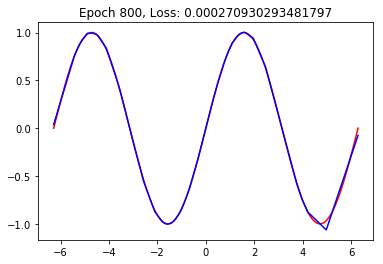

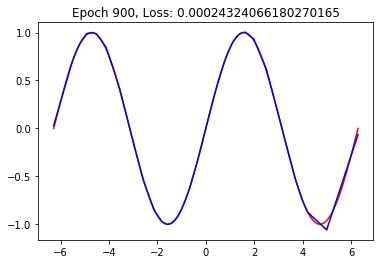

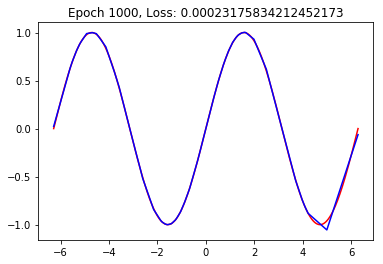

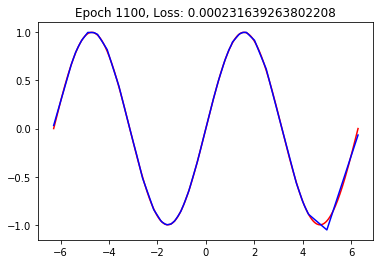

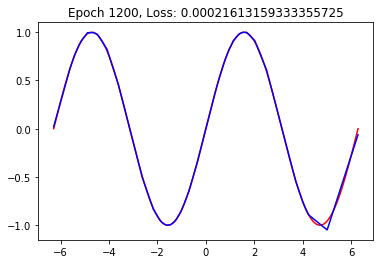

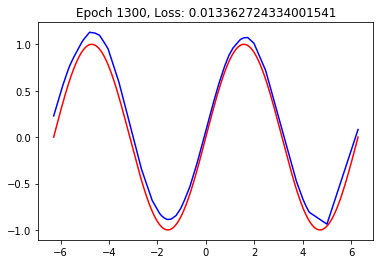

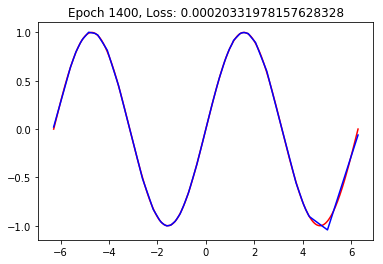

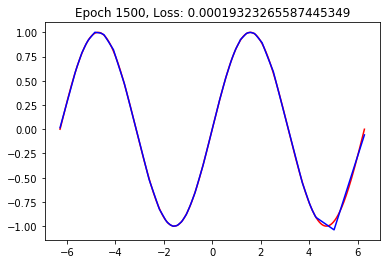

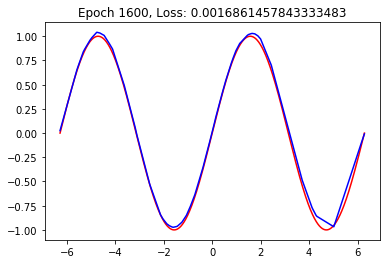

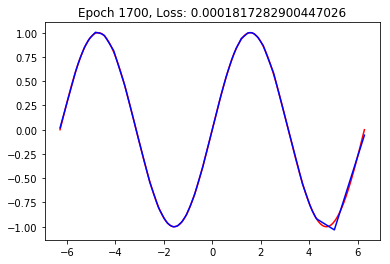

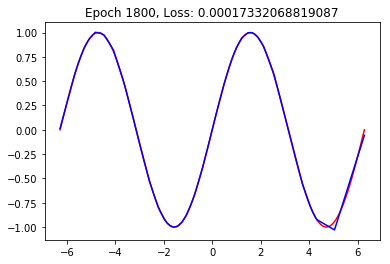

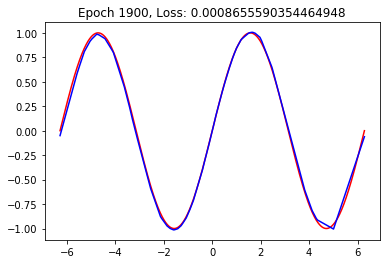

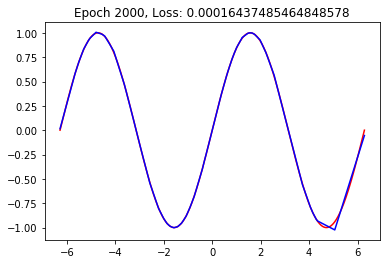

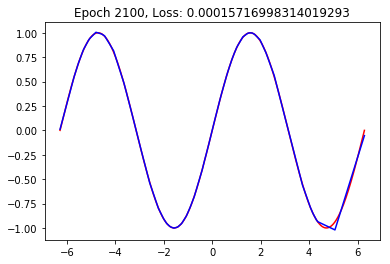

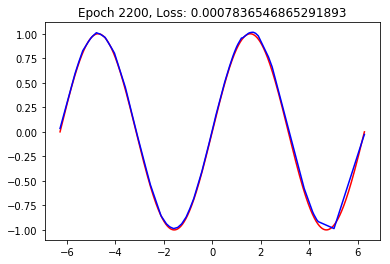

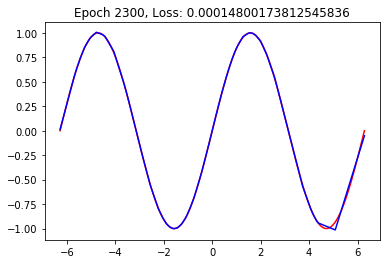

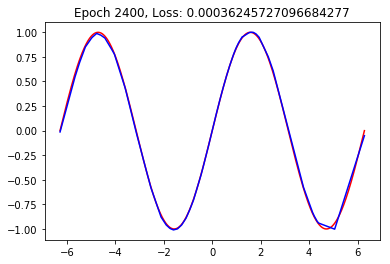

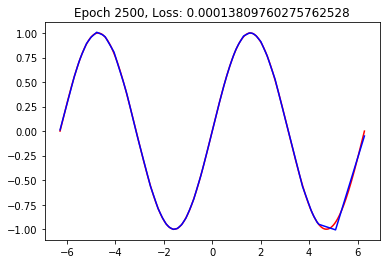

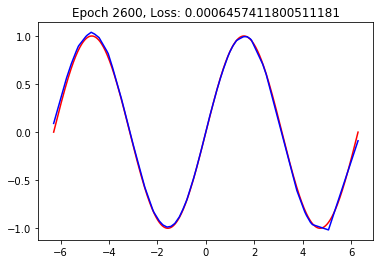

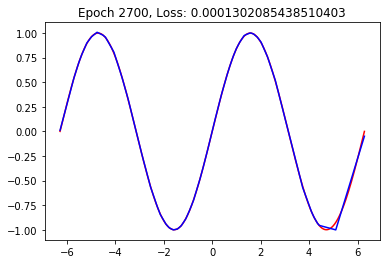

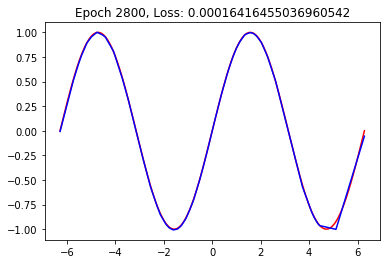

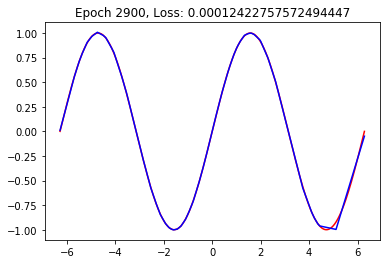

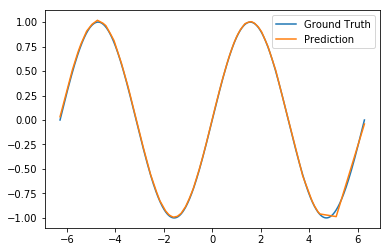

In [8]:
plt.plot(x.numpy(),y.numpy())
plt.show()
# 切分
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.05, random_state=42)
# 定义mlp模型
class MLPregression(nn.Module):
    def __init__(self):
        super(MLPregression, self).__init__()
        self.fc1 = nn.Linear(1, 64)  # 输入层到隐藏层
        self.fc2 = nn.Linear(64, 64)  # 隐藏层到隐藏层
        self.fc3 = nn.Linear(64, 1)  # 隐藏层到输出层

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

model = MLPregression()
loss_fn = nn.MSELoss()  #均方差做损失函数
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# 迭代次数
batches = 3000
plt.figure("Regression")
plt.ion()  #开启交互模式
plt.show()

for i in range(batches):
    optimizer.zero_grad()
    y_pred = model(x_train)
    loss = loss_fn(y_pred, y_train)
    loss.backward()
    optimizer.step()
    
    if i % 100 == 0:
        with torch.no_grad():
            plt.cla()  # 清除当前图形的所有轴
            sorted_indices = torch.argsort(x_train.view(-1))  # 获取排序后的索引
            plt.plot(x_train[sorted_indices].cpu().numpy(), y_train[sorted_indices].cpu().numpy(), 'r')
            plt.plot(x_train[sorted_indices].cpu().numpy(), y_pred[sorted_indices].cpu().numpy(), 'b')
            
            plt.title(f'Epoch {i}, Loss: {loss.item()}')
            plt.pause(0.01)

with torch.no_grad():
    plt.plot(x.cpu().numpy(), y.cpu().numpy(), label='Ground Truth')
    plt.plot(x.cpu().numpy(), model(x).detach().cpu().numpy(), label='Prediction')
    plt.legend()
    plt.show()


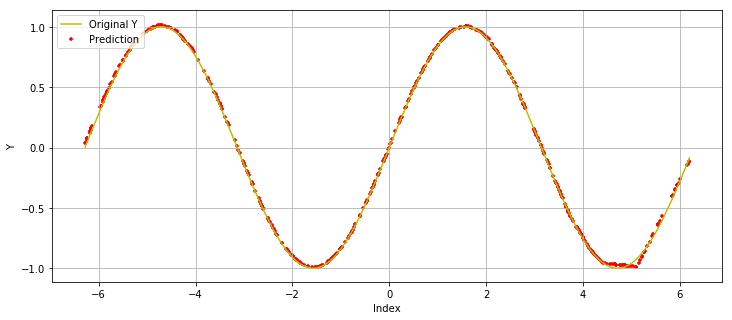

In [9]:
# 对测试集进行预测
sorted_indices = torch.argsort(x_val.view(-1))
test_x=x_val[sorted_indices]
y_test=y_val[sorted_indices]

pre_y=model(test_x)
pre_y=pre_y.data.numpy()
#可视化
plt.figure(figsize=(12,5))
plt.plot(test_x,y_test,"y",label="Original Y")
plt.scatter(test_x,pre_y,marker='+',s=20,c="r",label="Prediction")
plt.legend(loc="upper left")
plt.grid()
plt.xlabel("Index")
plt.ylabel("Y")
plt.show()